Work dir /Users/kitagawa/lecture/grb/230420/homework-01---data-input-output-with-python-hussainkitagawa/work
Main directory is /Users/kitagawa/lecture/grb/230420/homework-01---data-input-output-with-python-hussainkitagawa
data dir is /Users/kitagawa/lecture/grb/230420/homework-01---data-input-output-with-python-hussainkitagawa/data
** Total lines in file = 3985
** File contains 74 data lines
** header contains 143 columns
['rowid', 'pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod', 'pl_pnum', 'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_bmassj', 'pl_bmassprov', 'pl_radj', 'pl_dens', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_optmag', 'st_optband', 'gaia_gmag', 'st_teff', 'st_mass', 'st_rad', 'rowupdate', 'pl_tranflag', 'pl_rvflag', 'pl_imgflag', 'pl_astflag', 'pl_omflag', 'pl_cbflag', 'pl_angsep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp', 'pl_eqt', 'pl_insol', 'pl_massj', 'pl_msinij', 'pl_masse', 'pl_msinie',

Text(0, 0.5, 'Planet radius [m]')

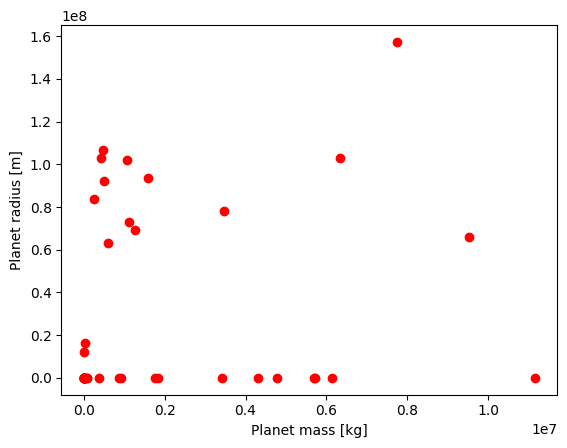

In [82]:
import numpy
import os   
import sys
import numpy as np #Numerical Python
import matplotlib.pyplot as plt

#Work directory
work_dir = os.getcwd()
print("Work dir %s" % work_dir)

#find main directory
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#find data directory
data_dir = os.path.join(main_dir,"data")
print("data dir is %s" % data_dir)

#Create result
results_dir = os.path.join(main_dir,"results")
##if the directory does not exist, you can create it
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)


#File name in data direcory
data_filename = "catalog_exoplanets_nasa.csv"
#Read file
data_filename = open(os.path.join(data_dir,data_filename),"r")  #r means reading mode

#Readlines: a list with a line each
divine_lines = data_filename.readlines()

#count total line in file
total = len(divine_lines)
print("** Total lines in file = %d" % total)

#print the first 20 lines
#print(divine_lines[0:20])


#loop for the first 10 lines; the line number; the length of each line and the line content 
#for li in range(10):
    #print(li,len(divine_lines[li]),divine_lines[li])


#loop for the first 10 lines: create an output list with only the lines that we want
out_list=[]
#for li in range(10): #read first 10 lines
for li in range(220):# read all lines
    line = divine_lines[li].strip("\n")
    if (len(line)>0): #check if value exist
        #comments lines start with #
        if (line[0]!="#"):
          #print(line)
          out_list.append(line)

print("** File contains %d data lines" % len(out_list))

#use the first line as header containing the column names
header = out_list[0]
column_names = header.split(",")
print("** header contains %d columns" % len(column_names))
print(column_names)

#create and init a dictionary of lists:
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]


#start from index 1 (skip the first line containing the headers)
for ri in range(1,len(out_list)):
    data_line = out_list[ri].split(",")
    #print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        val = data_line[ci]
        #Row ID
        #if  column_names[ci] ==  "rowid":
            #print('rowid = ', val)
        #check if string is empty
        if data_line[ci] == "": 
            data_line[ci] = '0' #fill 0
            val = int(data_line[ci])
            
        #Change the unit;            
        if column_names[ci] == "pl_orbper": # Orbital Period [days]
            val = float(data_line[ci])*60*60*24 #day -> second
            #print('pl_orbper = ', val)
        if column_names[ci] == "pl_massj": # Planet mass (Jupiter mass)
            val = float(data_line[ci])*1.898*10**27 #in kg
            #print('pl_massj = ', val)
        if column_names[ci] == "pl_masse": # Planet mass (Earth mass)
            val = float(data_line[ci])*5.972168*10*24 #in kg 
            #print('pl_masse = ', val)  
        if column_names[ci] == "pl_rade": # Planet radius (Earth radius)
            val = float(data_line[ci])*6378*10**3 #in meter
            #print('pl_rade = ', val)
        if column_names[ci] == "pl_ratdor": # Ratio of Distance to Stellar Radius
            val = float(data_line[ci])
            #print('pl_ratdor = ', val)
            
        data_dict[column_names[ci]].append(val)

#print pl_hostname
#print(data_dict["pl_massj"])   

#convert list to numpy arrays
data_dict["pl_orbper"]=np.asarray(data_dict["pl_orbper"])# Orbital Period [days]
data_dict["pl_massj"]=np.asarray(data_dict["pl_massj"])# Planet mass (Jupiter mass)
data_dict["pl_masse"]=np.asarray(data_dict["pl_masse"])# Planet mass (Earth mass)
data_dict["pl_rade"]=np.asarray(data_dict["pl_rade"])# Planet radius (Earth radius)
data_dict["pl_ratdor"]=np.asarray(data_dict["pl_ratdor"])# Ratio of Distance to Stellar Radius

#scatter plot
plt.scatter(data_dict["pl_masse"],data_dict["pl_rade"],marker="o",color="red",)
plt.xlabel("Planet mass [kg]")
plt.ylabel("Planet radius [m]")

Text(0.5, 0, 'Planet mass [kg]')

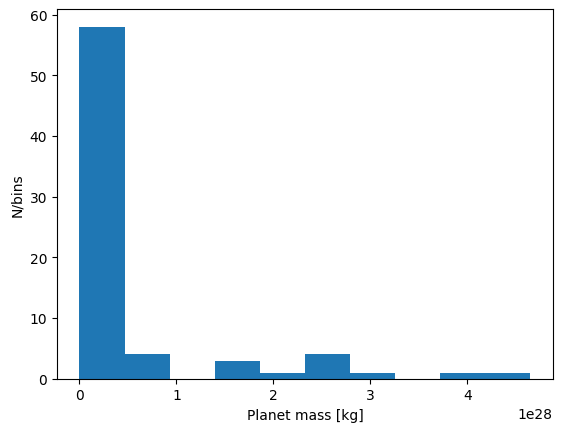

In [80]:
#histograms
plt.hist(data_dict["pl_massj"])
plt.ylabel("N/bins")
plt.xlabel("Planet mass [kg]")

In [83]:
#define the filename, use the results path
test_out_filename = os.path.join(results_dir,"catalog_exoplanets_nasa.txt")

#use the open command
test_out_file = open(test_out_filename,"w")  #writing mode

#wrtite in output_file
for i in range(len(out_list)):
    test_out_file.write(out_list[i])  
    
#IMPORTANT: don't forget to close the file!
test_out_file.close()